Hello!
In the cell below I have written a random walk code:
The code models how an object (e.g. ball, atom) gets propagated from node to node (e.g. person, surface site etc.) in a random manner. The model has 4 possible directions (with equal probability) from each node for simplicity.
The code is by no means "clean" and doesn't use shortcuts that could be used to shorten the code.

In [2]:
import random
#The function below returns the x, y coordinates after a "n" step long random walk
def randomwalk(n):
    x = 0
    y = 0
    for i in range(n):
        step = random.choice(['up','down','left','right'])
        if step == 'up':
            y = y + 1
        elif step == 'down':
            y = y - 1
        elif step == 'left':
            x = x - 1
        elif step == 'right':
            x = x + 1
    return(x,y)
#Here I randomly decide to do randomly 100 moves and see where I end up
walk = randomwalk(100)
print(walk)
print() # empty line for clarity
#Here I do 10 times a 100 step random walk
for i in range(10):
    walk = randomwalk(100)
    print(walk)


(-3, -3)

(-10, -10)
(-4, 2)
(9, -17)
(11, -1)
(0, 2)
(-3, -9)
(8, 4)
(-11, 3)
(1, -11)
(3, 9)


I suppose one could then do thousands of these random walks to see how far an object finds itself from the initial node on average after n steps.Now, we can change the previous code slightly to turn it into a kMC model.


In [3]:
import math
def randomwalk():
    t=0
    x = 0
    y = 0
    while t<2:
        step = random.choice(['up','down','left','right'])
        #Here I invert the [0,1) interval of the random.random() to (0,1] to ensure we don't have the possibility of ln(0)
        r=1-random.random()
        #I chose the total rate to be 1 (0.25+0.25+0.25+0.25)
        t=t-math.log(r)/1
        if step == 'up':
            y = y + 1
        elif step == 'down':
            y = y - 1
        elif step == 'left':
            x = x - 1
        elif step == 'right':
            x = x + 1
        print(x,y)
        print(t)
    return(x,y)
walk=randomwalk()
print(walk)

0 -1
0.00924848787148407
0 0
0.5648454559526809
0 -1
1.4139573384070117
0 -2
2.417793272978453
(0, -2)


Now, this code can be also written in a more "pythonny" way, the code below does nearly the same thing as the code in the cell above


In [4]:
import random
import math
def random_walk():
    t = 0
    position = [0,0] #initial position, x=0 and y=0
    movements = [[0,1],[0,-1],[1,0],[-1,0]] # right,left, up,down
    while t < 2:
        step = random.choice(movements)
        random_var = 1-random.random()
        t = t- math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        print(position)
        print(t)
random_walk()

[-1, 0]
0.09230615231000147
[0, 0]
1.4668139192829561
[-1, 0]
2.3550175649950384


Now, this is already cool and the code obviously works. However, it would be nice for it to generate a list with the coordinates at each step; this could then be plotted to see how the  object moves randomly. I haven't managed to do this yet.

In [1]:
import random
import math
import copy
def random_walk():
    t = 0
    position = [0,0] #initial position, x=0 and y=0
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0]] # up,down, right,down
    while t < 2:
        step = random.choice(movements)
        random_var = 1-random.random()
        t = t- math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        print(position)
        list_of_positions.append(copy.copy(position))
        print(t)
    return(list_of_positions)
the_list = copy.copy(random_walk())
print(the_list)

[0, 1]
0.7926621681292835
[0, 0]
0.8927380959091786
[0, 1]
1.250951727688565
[-1, 1]
2.9123248240186035
[[0, 1], [0, 0], [0, 1], [-1, 1]]


In [4]:
import random
import math
import copy
def random_walk():
    time = 0
    position = [0,0] #initial position, x=0 and y=0
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1]] # up,down,right,left,up-right,up-left,down-right,
    while time < 2:
        step = random.choice(movements)
        random_var = 1-random.random()
        time = time- math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        print(position)
        list_of_positions.append(copy.copy(position))
        print(time)
    return(list_of_positions)
the_list = copy.copy(random_walk())
print(the_list)

[-1, 0]
0.9055428540814477
[-2, 1]
1.5265329935423324
[-2, 0]
2.3352800132094873
[[-1, 0], [-2, 1], [-2, 0]]


From here on below, there are 8 possible directions for the random walk.







It's a bit boring always starting at (0,0) hence in the codes below I draw 2 random integers for the initial position between 1 and 100 for x and y.

[71, 9]


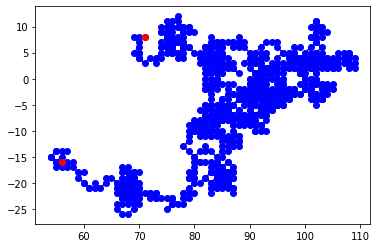

In [8]:
import random
import math
import copy
import matplotlib.pyplot as plt

 

def random_walk():
    a= random.randint(1,100) #generates an integer between 1 and 100, used to generate initial position of x coord.
    b= random.randint(1,100)  #generates an integer between 1 and 100, used to generate initial position of y coord.
    print([a,b])
    K_1=10 #up
    K_2=10 #down
    K_3=10 # right
    K_4=10 #left
    K_5=10 #right,top
    K_6= 10 #left,top
    K_7= 10 #right,bottom
    K_8= 10 #left,bottom
    K_tot= K_1+K_2+K_3+K_4+K_5+K_6+K_7+K_8
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1]]
    weights = [ K_1/K_tot,K_2/K_tot,K_3/K_tot,K_4/K_tot,K_5/K_tot,K_6/K_tot,K_7/K_tot,K_8/K_tot]
    while time < 1000:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position),round(time*100)/100])
    return(list_of_positions)
   

 

list_list_pos = []
for i in range(1):
    list_list_pos.append(copy.copy(random_walk()))

 

for list_pos in list_list_pos:
    list_pos_no_time_x = []
    list_pos_no_time_y = []
    for pos in list_pos:
        list_pos_no_time_x.append(pos[0][0])
        list_pos_no_time_y.append(pos[0][1])
    #print(list_pos_no_time_x)
    #print(list_pos_no_time_y)
    plt.plot(list_pos_no_time_x,list_pos_no_time_y,marker='o',c = 'blue')
    plt.plot(list_pos_no_time_x[0],list_pos_no_time_y[0],list_pos_no_time_x[len(list_pos_no_time_x)-1],list_pos_no_time_y[len(list_pos_no_time_y)-1],marker='o',c = 'red')
    
plt.show()

Now, this pattern looks very random. However, it can be influenced to go favourably in one direction, say top-right. See the code below, the corresponding rate constant is massive compared to the other ones.Event top right associated with 99.993% probability

[57, 54]


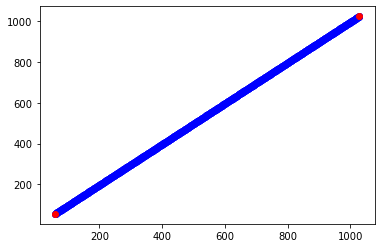

In [1]:
import random
import math
import copy
import matplotlib.pyplot as plt

 

def random_walk():
    a= random.randint(1,100)
    b= random.randint(1,100)
    print([a,b])
    K_1=10 #up
    K_2=10 #down
    K_3=10 # right
    K_4=10 #left
    K_5=1000000 #right,top
    K_6= 10 #left,top
    K_7= 10 #right,bottom
    K_8= 10 #left,bottom
    K_tot= K_1+K_2+K_3+K_4+K_5+K_6+K_7+K_8
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1]]
    weights = [ K_1/K_tot,K_2/K_tot,K_3/K_tot,K_4/K_tot,K_5/K_tot,K_6/K_tot,K_7/K_tot,K_8/K_tot]
    while time < 1000:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)  # Here it should be divided by K_tot, but due to processing limits it has been omitted from here on 
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position),round(time*100)/100])
    return(list_of_positions)
   

 

list_list_pos = []
for i in range(1):
    list_list_pos.append(copy.copy(random_walk()))

 

for list_pos in list_list_pos:
    list_pos_no_time_x = []
    list_pos_no_time_y = []
    for pos in list_pos:
        list_pos_no_time_x.append(pos[0][0])
        list_pos_no_time_y.append(pos[0][1])
    #print(list_pos_no_time_x)
    #print(list_pos_no_time_y)
    plt.plot(list_pos_no_time_x,list_pos_no_time_y,marker='o',c = 'blue')
    plt.plot(list_pos_no_time_x[0],list_pos_no_time_y[0],list_pos_no_time_x[len(list_pos_no_time_x)-1],list_pos_no_time_y[len(list_pos_no_time_y)-1],marker='o',c = 'red')
    
plt.show()

Bit of an overkill, but the line clearly appears to be perfectly linear, no signs of a random walk. How about we bring the ratio down from 1000000 to 10 (compared to another event) to 1000 to 10 (compared another event)?
Event top-right now has a 93.45....% probability.

[7, 63]


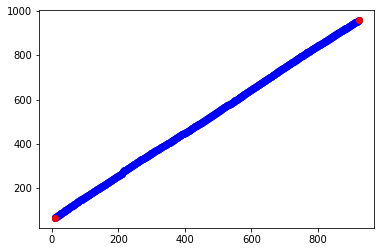

In [4]:
import random
import math
import copy
import matplotlib.pyplot as plt

 

def random_walk():
    a= random.randint(1,100)
    b= random.randint(1,100)
    print([a,b])
    K_1=10 #up
    K_2=10 #down
    K_3=10 # right
    K_4=10 #left
    K_5=1000 #right,top
    K_6= 10 #left,top
    K_7= 10 #right,bottom
    K_8= 10 #left,bottom
    K_tot= K_1+K_2+K_3+K_4+K_5+K_6+K_7+K_8
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1]]
    weights = [ K_1/K_tot,K_2/K_tot,K_3/K_tot,K_4/K_tot,K_5/K_tot,K_6/K_tot,K_7/K_tot,K_8/K_tot]
    while time < 1000:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)/K_tot
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position),round(time*100)/100])
    return(list_of_positions)
   

 

list_list_pos = []
for i in range(1):
    list_list_pos.append(copy.copy(random_walk()))

 

for list_pos in list_list_pos:
    list_pos_no_time_x = []
    list_pos_no_time_y = []
    for pos in list_pos:
        list_pos_no_time_x.append(pos[0][0])
        list_pos_no_time_y.append(pos[0][1])
    #print(list_pos_no_time_x)
    #print(list_pos_no_time_y)
    plt.plot(list_pos_no_time_x,list_pos_no_time_y,marker='o',c = 'blue')
    plt.plot(list_pos_no_time_x[0],list_pos_no_time_y[0],list_pos_no_time_x[len(list_pos_no_time_x)-1],list_pos_no_time_y[len(list_pos_no_time_y)-1],marker='o',c = 'red')
plt.show()   

Even when it's only 10^3 times bigger it shows a dominating effect. I will now bring it to a 100  to 10. Probability of top-right is now 58.82....%

[70, 90]


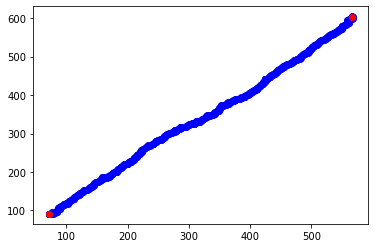

In [13]:
import random
import math
import copy
import matplotlib.pyplot as plt

 

def random_walk():
    a= random.randint(1,100)
    b= random.randint(1,100)
    print([a,b])
    K_1=10 #up
    K_2=10 #down
    K_3=10 # right
    K_4=10 #left
    K_5=100 #right,top
    K_6= 10 #left,top
    K_7= 10 #right,bottom
    K_8= 10 #left,bottom
    K_tot= K_1+K_2+K_3+K_4+K_5+K_6+K_7+K_8
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1]]
    weights = [ K_1/K_tot,K_2/K_tot,K_3/K_tot,K_4/K_tot,K_5/K_tot,K_6/K_tot,K_7/K_tot,K_8/K_tot]
    while time < 1000:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position),round(time*100)/100])
    return(list_of_positions)
   

 

list_list_pos = []
for i in range(1):
    list_list_pos.append(copy.copy(random_walk()))

 

for list_pos in list_list_pos:
    list_pos_no_time_x = []
    list_pos_no_time_y = []
    for pos in list_pos:
        list_pos_no_time_x.append(pos[0][0])
        list_pos_no_time_y.append(pos[0][1])
    #print(list_pos_no_time_x)
    #print(list_pos_no_time_y)
    plt.plot(list_pos_no_time_x,list_pos_no_time_y,marker='o',c = 'blue')
    plt.plot(list_pos_no_time_x[0],list_pos_no_time_y[0],list_pos_no_time_x[len(list_pos_no_time_x)-1],list_pos_no_time_y[len(list_pos_no_time_y)-1],marker='o',c = 'red')
    
plt.show()

However, one possibility is also that the object doesn't move from one one position to another, i.e. stays in place. This can be easily added by the addition of a 9th rate constant, see below,

[83, 81]


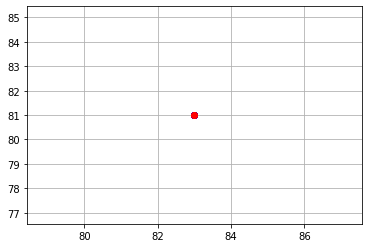

In [7]:
import random
import math
import copy
import matplotlib.pyplot as plt

 

def random_walk():
    a= random.randint(1,100)
    b= random.randint(1,100)
    print([a,b])
    K_1=10 #up
    K_2=10 #down
    K_3=10 # right
    K_4=10 #left
    K_5=1000 #right,top
    K_6= 10 #left,top
    K_7= 10 #right,bottom
    K_8= 10 #left,bottom
    K_9= 100000000 #stays where it was
    K_tot= K_1+K_2+K_3+K_4+K_5+K_6+K_7+K_8+K_9
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1],[0,0]]
    weights = [ K_1/K_tot,K_2/K_tot,K_3/K_tot,K_4/K_tot,K_5/K_tot,K_6/K_tot,K_7/K_tot,K_8/K_tot,K_9/K_tot]
    while time < 1000:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position),round(time*100)/100])
    return(list_of_positions)
   

 

list_list_pos = []
for i in range(1):
    list_list_pos.append(copy.copy(random_walk()))

 

for list_pos in list_list_pos:
    list_pos_no_time_x = []
    list_pos_no_time_y = []
    for pos in list_pos:
        list_pos_no_time_x.append(pos[0][0])
        list_pos_no_time_y.append(pos[0][1])
    #print(list_pos_no_time_x)
    #print(list_pos_no_time_y)
    plt.plot(list_pos_no_time_x,list_pos_no_time_y,marker='o',c = 'blue')
    plt.plot(list_pos_no_time_x[0],list_pos_no_time_y[0],list_pos_no_time_x[len(list_pos_no_time_x)-1],list_pos_no_time_y[len(list_pos_no_time_y)-1],marker='o',c = 'red')
    

plt.grid()

Now, I'm gonna create the dataframe using pandas and check that it works.

[33, 6]
     X  Y       time
0   33  6          0
1   33  5  0.0867347
2   34  6    1.16892
3   35  6    1.94432
4   36  6    3.50679
5   37  7    3.59512
6   36  7    6.64427
7   36  6    6.84106
8   36  5    7.35196
9   37  4    7.96218
10  38  5     8.1714
11  37  6    8.20047
12  36  6    9.63841
13  37  5    9.85703
14  37  4    10.6595
AxesSubplot(0.125,0.125;0.775x0.755)


[[[33, 5], 0.09],
 [[34, 6], 1.17],
 [[35, 6], 1.94],
 [[36, 6], 3.51],
 [[37, 7], 3.6],
 [[36, 7], 6.64],
 [[36, 6], 6.84],
 [[36, 5], 7.35],
 [[37, 4], 7.96],
 [[38, 5], 8.17],
 [[37, 6], 8.2],
 [[36, 6], 9.64],
 [[37, 5], 9.86],
 [[37, 4], 10.66]]

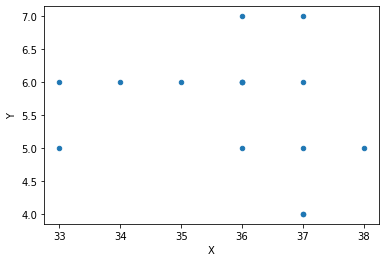

In [7]:
import random
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd


def random_walk():
    a = random.randint(1, 100)
    b = random.randint(1, 100)
    pandas_df = pd.DataFrame(columns=['X', 'Y', 'time'])
    print([a, b])
    K_1 = 10  # up
    K_2 = 10  # down
    K_3 = 10  # right
    K_4 = 10  # left
    K_5 = 10  # right,top
    K_6 = 10  # left,top
    K_7 = 10  # right,bottom
    K_8 = 10  # left,bottom
    K_tot = K_1 + K_2 + K_3 + K_4 + K_5 + K_6 + K_7 + K_8
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0, 1], [0, -1], [1, 0], [-1, 0], [1, 1], [-1, 1], [1, -1], [-1, -1]]
    weights = [K_1 / K_tot, K_2 / K_tot, K_3 / K_tot, K_4 / K_tot, K_5 / K_tot, K_6 / K_tot, K_7 / K_tot, K_8 / K_tot]
    pandas_df.loc[0] = [a] + [b] + [0]
    line = 1
    while time < 10:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position), round(time * 100) / 100])
        pandas_df.loc[line] = [position[0]] + [position[1]] + [time]
        line += 1
    print(pandas_df)
    plot_of_the_randomwalk = pandas_df.plot.scatter(x='X', y='Y',s=None,c=None)
    print(plot_of_the_randomwalk)
    return list_of_positions

 

random_walk()

Well, the table with x,y and time is clearly working like hoped. Thus, we can now remove the extra table below that we do not need.

[18, 72]
     X   Y      time
0   18  72         0
1   17  73  0.681098
2   17  72   1.03863
3   18  72   1.19477
4   19  71   4.44135
5   18  71   5.86206
6   19  71   6.11347
7   18  70   7.21307
8   18  69   7.68389
9   18  70   8.27364
10  18  71   9.67948
11  19  70   10.5302
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


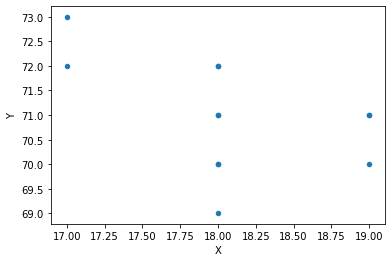

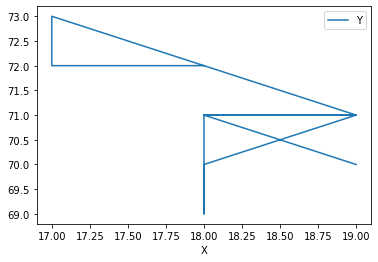

In [16]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd


def random_walk():
    a = random.randint(1, 100)
    b = random.randint(1, 100)
    pandas_df = pd.DataFrame(columns=['X', 'Y', 'time'])
    print([a, b])
    K_1 = 10  # up
    K_2 = 10  # down
    K_3 = 10  # right
    K_4 = 10  # left
    K_5 = 10  # right,top
    K_6 = 10  # left,top
    K_7 = 10  # right,bottom
    K_8 = 10  # left,bottom
    K_tot = K_1 + K_2 + K_3 + K_4 + K_5 + K_6 + K_7 + K_8
    time = 0
    position = [a, b]
    movements = [[0, 1], [0, -1], [1, 0], [-1, 0], [1, 1], [-1, 1], [1, -1], [-1, -1]]
    weights = [K_1 / K_tot, K_2 / K_tot, K_3 / K_tot, K_4 / K_tot, K_5 / K_tot, K_6 / K_tot, K_7 / K_tot, K_8 / K_tot]
    pandas_df.loc[0] = [a] + [b] + [0]
    line = 1
    while time < 10:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        pandas_df.loc[line] = [position[0]] + [position[1]] + [time]
        line += 1
    print(pandas_df)
    plot_of_the_randomwalk = pandas_df.plot.scatter(x='X', y='Y',s=None,c=None)
    plot_of_the_randomwalk1 = pandas_df.plot.line(x='X', y='Y',c=None)
    print(plot_of_the_randomwalk)
    print(plot_of_the_randomwalk1)
random_walk()


Now, for a longer time, say 1000.

[81, 83]
       X     Y      time
0     81    83         0
1     81    84  0.386821
2     81    85   2.41264
3     81    86   3.48267
4     81    87   5.48106
...   ..   ...       ...
1067  79  1128   997.629
1068  79  1129    997.71
1069  79  1130    998.23
1070  79  1131   998.833
1071  79  1132   1000.48

[1072 rows x 3 columns]


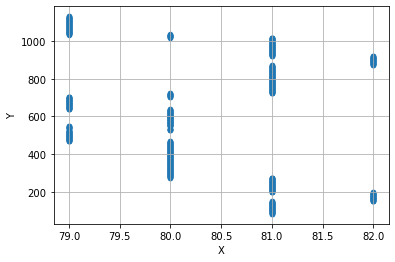

In [16]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd


def random_walk():
    a = random.randint(1, 100)
    b = random.randint(1, 100)
    pandas_df = pd.DataFrame(columns=['X', 'Y', 'time'])
    print([a, b])
    K_1 = 10000  # up
    K_2 = 10  # down
    K_3 = 10  # right
    K_4 = 10  # left
    K_5 = 10  # right,top
    K_6 = 10  # left,top
    K_7 = 10  # right,bottom
    K_8 = 10  # left,bottom
    K_tot = K_1 + K_2 + K_3 + K_4 + K_5 + K_6 + K_7 + K_8
    time = 0
    position = [a, b]
    movements = [[0, 1], [0, -1], [1, 0], [-1, 0], [1, 1], [-1, 1], [1, -1], [-1, -1]]
    weights = [K_1 / K_tot, K_2 / K_tot, K_3 / K_tot, K_4 / K_tot, K_5 / K_tot, K_6 / K_tot, K_7 / K_tot, K_8 / K_tot]
    pandas_df.loc[0] = [a] + [b] + [0]
    line = 1
    while time < 1000:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        pandas_df.loc[line] = [position[0]] + [position[1]] + [time]
        line += 1
    print(pandas_df)
    fig,ax = plt.subplots()
    plot_of_the_randomwalk = pandas_df.plot(kind='scatter',x='X', y='Y',s=None,ax=ax)
    ax.grid()
    plt.show()
random_walk()


Now, static plots are a bit boring...Hence, I wanted the plots to be animated. Didn't have time to see how to do that unfortunately.

[69, 56]
      X    Y      time
0    69   56         0
1    69   57  0.237331
2    69   58  0.612464
3    69   59   1.41722
4    69   60   3.71045
..   ..  ...       ...
939  68  992   994.744
940  68  993    995.72
941  68  994   998.482
942  68  995   999.841
943  68  996   1000.51

[944 rows x 3 columns]


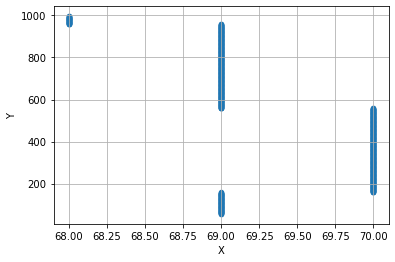

In [18]:
random_walk()

function(input here list of k values,concentration of acceptors, number of excitons )
Grid: 100x100 , insert acceptors 
one panda data with x,y coord true or false if acceptor you can either stop stimulation 

10:1 donor:acceptor 
